In [30]:
import wandb
import matplotlib.pyplot as plt
from dataclasses import dataclass
import matplotlib.ticker as ticker
api = wandb.Api()

In [31]:
@dataclass
class Protein:
    name: str
    protein_id: str
    run_id: str
    run_multitask_id: str
    t_fold_ns: float
    t_unfold_ns: float

    def __post_init__(self):
        wandb_run = api.run(f'csml/encoderops-{self.protein_id}/{self.run_id}').history()
        self.single = {
            "tau": wandb_run['tau_1_ns'].values,
            "samples": wandb_run['samples'].values
        }
        wandb_run = api.run(f'csml/encoderops-CLN025-2JOF-2F4K/{self.run_multitask_id}').history()
        self.multi = {
            "tau": wandb_run[f'{self.protein_id} tau_1_ns'].values,
            "samples": wandb_run['samples'].values
        }    

In [32]:
chignolin = Protein(
    name = 'chignolin',
    protein_id = 'CLN025',
    run_id = 'd9mundb3',
    run_multitask_id = 'iemtl4ug',
    t_fold_ns = 610.,
    t_unfold_ns = 2240.
)

villin = Protein(
    name = 'villin',
    protein_id = '2F4K',
    run_id = 'fsl1u98m',
    run_multitask_id = 'iemtl4ug',
    t_fold_ns = 2850.,
    t_unfold_ns = 920.
)

trpcage = Protein(
    name = 'trp-cage',
    protein_id = '2JOF',
    run_id = 'o778zvrh',
    run_multitask_id = 'iemtl4ug',
    t_fold_ns = 14400.,
    t_unfold_ns = 3100.
)

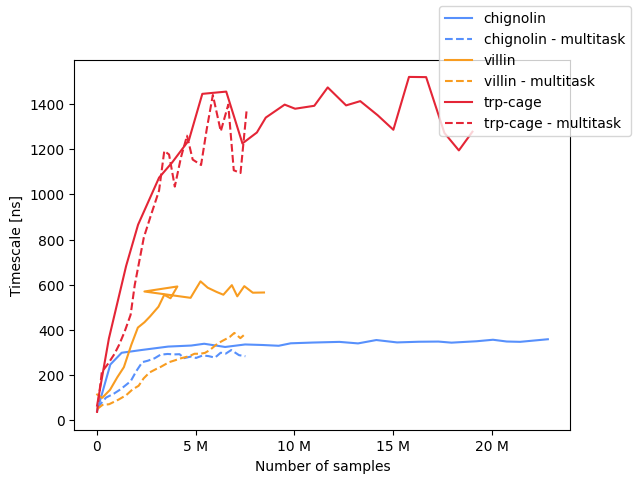

In [34]:
colors = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]
fig, ax = plt.subplots()
for color, protein in zip(colors, [chignolin, villin, trpcage]):
    x = protein.single['samples'][::20]
    y = protein.single['tau'][::20]
    ax.plot(x, y, color=color, label = protein.name)

    x = protein.multi['samples'][::20]
    y = protein.multi['tau'][::20]
    ax.plot(x, y, '--', color=color, label = f"{protein.name} - multitask")
    #ax.axhline(min(protein.t_fold_ns, protein.t_unfold_ns), color=color)
ax.set_ylabel("Timescale [ns]")
ax.set_xlabel("Number of samples")
ax.xaxis.set_major_formatter(ticker.EngFormatter())
fig.legend()